In [1]:
# Notebook 2: From Letters to Meaning - How Computers Understand Language

🚀 ENCODINGS vs EMBEDDINGS: How Computers See Language


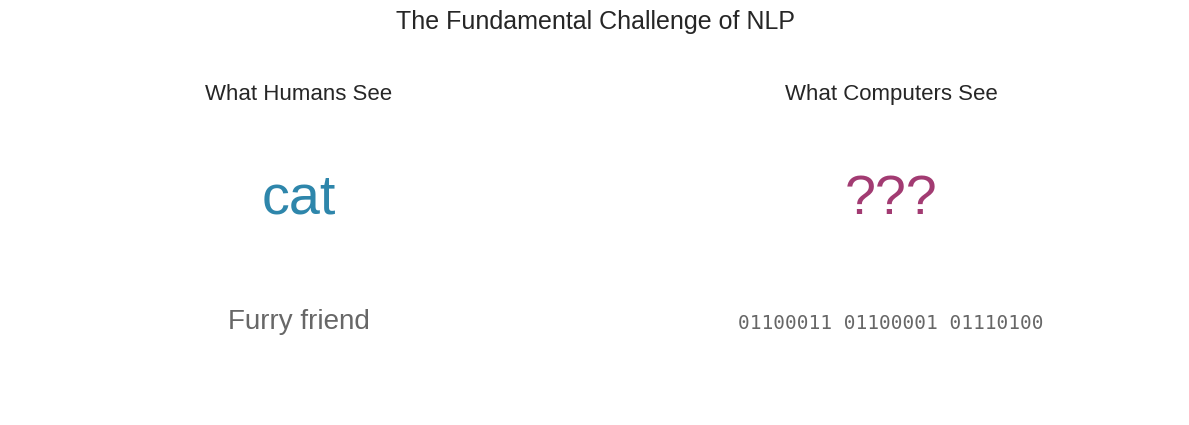


Computers need numbers to work with text!
But not all number representations are equal...



In [2]:
import sys
sys.path.insert(0, '/home/jovyan/.local/lib/python3.10/site-packages')

# import plotly
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, Dropdown, HBox, VBox, Output
import requests
import json


# Set style for beautiful visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("🚀 ENCODINGS vs EMBEDDINGS: How Computers See Language")
print("=" * 60)

def visualize_the_problem():
    """Show why we need to convert text to numbers"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Human view
    ax1.text(0.5, 0.7, "cat", fontsize=40, ha='center', color='#2E86AB')
    ax1.text(0.5, 0.3, "Furry friend", fontsize=20, ha='center', alpha=0.7)
    ax1.set_title("What Humans See", fontsize=16, pad=20)
    ax1.axis('off')
    
    # Computer view  
    ax2.text(0.5, 0.7, "???", fontsize=40, ha='center', color='#A23B72')
    ax2.text(0.5, 0.3, "01100011 01100001 01110100", fontsize=14, ha='center',
             family='monospace', alpha=0.7)
    ax2.set_title("What Computers See", fontsize=16, pad=20)
    ax2.axis('off')
    
    plt.suptitle("The Fundamental Challenge of NLP", fontsize=18, y=1.05)
    plt.tight_layout()
    plt.show()
    
    print("\nComputers need numbers to work with text!")
    print("But not all number representations are equal...\n")

# Run this
visualize_the_problem()

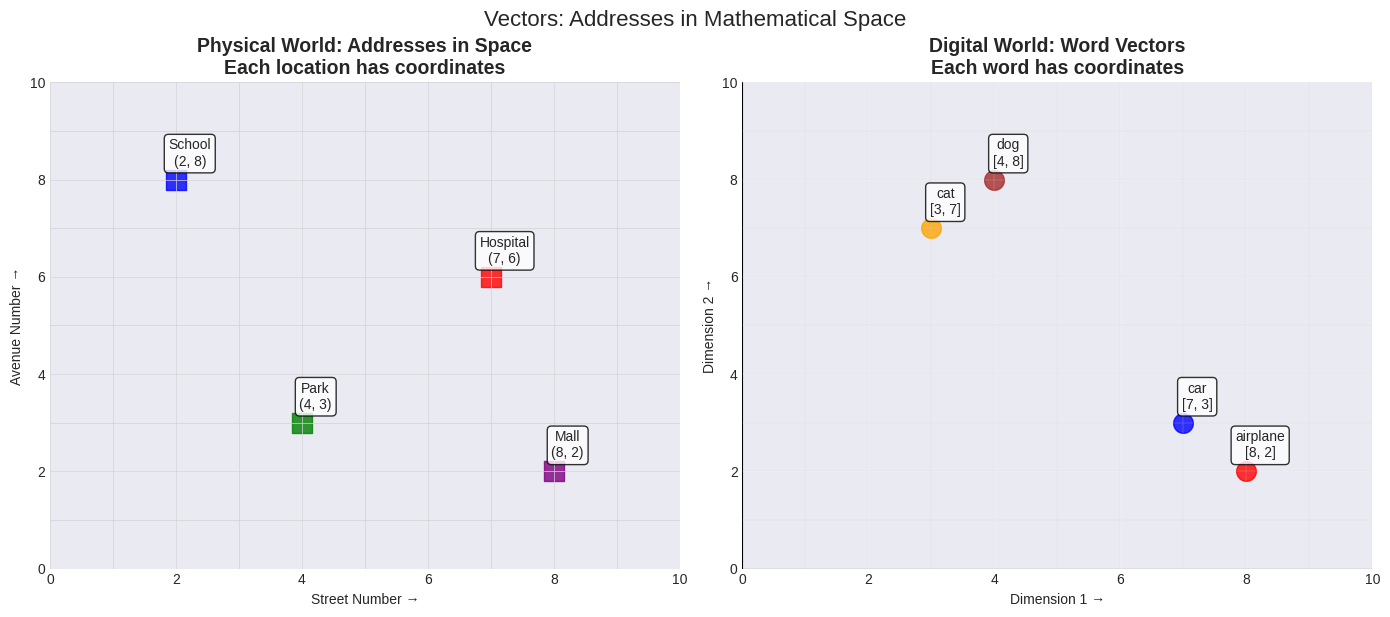

WHAT ARE VECTORS?
🏠 Just like buildings have addresses: Hospital = (7, 6)
📝 Words can have addresses too: 'cat' = [3, 7]

💡 A vector is simply coordinates that tell us
   WHERE something is located in mathematical space

🎯 The key question: How do we choose good addresses?
   Should words with similar meanings get similar addresses?


In [3]:
def introduce_vectors_concept():
    """
    Simple introduction to what vectors are - addresses in space
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # LEFT SIDE: Physical addresses we understand
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    
    # Draw a simple city grid
    # Streets
    for i in range(11):
        ax1.axhline(i, color='lightgray', linewidth=0.5)
        ax1.axvline(i, color='lightgray', linewidth=0.5)
    
    # Place some buildings
    locations = {
        'School': (2, 8),
        'Hospital': (7, 6),
        'Park': (4, 3),
        'Mall': (8, 2)
    }
    
    colors = ['blue', 'red', 'green', 'purple']
    for i, (place, (x, y)) in enumerate(locations.items()):
        ax1.scatter(x, y, s=200, c=colors[i], alpha=0.8, marker='s')
        ax1.annotate(f'{place}\n({x}, {y})', (x, y), 
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=10, ha='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax1.set_title('Physical World: Addresses in Space\nEach location has coordinates', 
                  fontsize=14, weight='bold')
    ax1.set_xlabel('Street Number →')
    ax1.set_ylabel('Avenue Number →')
    ax1.grid(True, alpha=0.3)
    
    # RIGHT SIDE: Word vectors - addresses for words
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    
    # Draw coordinate system
    ax2.axhline(0, color='black', linewidth=0.8)
    ax2.axvline(0, color='black', linewidth=0.8)
    for i in range(1, 11):
        ax2.axhline(i, color='lightgray', linewidth=0.3, alpha=0.5)
        ax2.axvline(i, color='lightgray', linewidth=0.3, alpha=0.5)
    
    # Place some words in the space
    word_locations = {
        'cat': (3, 7),
        'dog': (4, 8),
        'car': (7, 3),
        'airplane': (8, 2)
    }
    
    word_colors = ['orange', 'brown', 'blue', 'red']
    for i, (word, (x, y)) in enumerate(word_locations.items()):
        ax2.scatter(x, y, s=200, c=word_colors[i], alpha=0.8, marker='o')
        ax2.annotate(f'{word}\n[{x}, {y}]', (x, y), 
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=10, ha='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax2.set_title('Digital World: Word Vectors\nEach word has coordinates', 
                  fontsize=14, weight='bold')
    ax2.set_xlabel('Dimension 1 →')
    ax2.set_ylabel('Dimension 2 →')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Vectors: Addresses in Mathematical Space', fontsize=16, y=1.02)
    plt.show()
    
    # Simple explanation
    print("WHAT ARE VECTORS?")
    print("=" * 17)
    print("🏠 Just like buildings have addresses: Hospital = (7, 6)")
    print("📝 Words can have addresses too: 'cat' = [3, 7]")
    print()
    print("💡 A vector is simply coordinates that tell us")
    print("   WHERE something is located in mathematical space")
    print()
    print("🎯 The key question: How do we choose good addresses?")
    print("   Should words with similar meanings get similar addresses?")

# Run this introduction
introduce_vectors_concept()


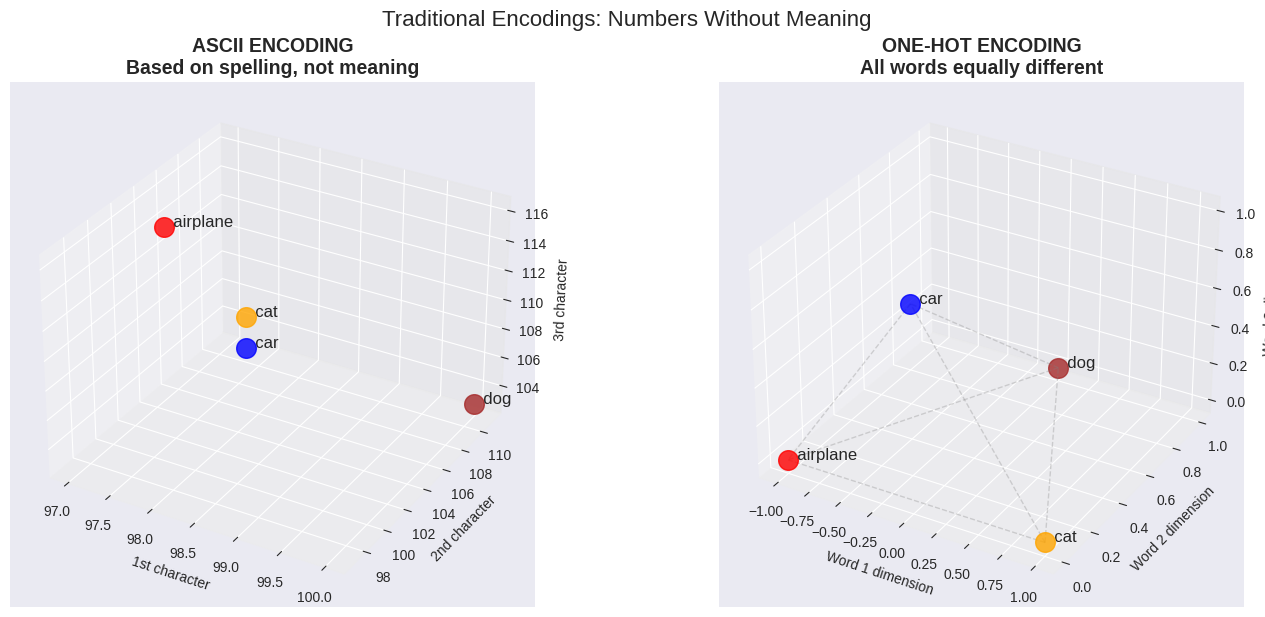

THE FUNDAMENTAL PROBLEM:

🐱 CAT and 🐶 DOG should be similar (both animals)
🚗 CAR and ✈️  AIRPLANE should be similar (both transportation)

But traditional encodings treat them as:
• ASCII: Based on spelling letters
• One-Hot: All equally different

❌ No understanding of MEANING or RELATIONSHIPS
❌ Computer can't tell that animals go together
❌ Computer can't tell that vehicles go together


In [4]:
# PART 3: SIMPLE ENCODINGS
# ============================================

def show_encoding_problems():
    """
    Show why traditional encodings don't capture meaning
    Focus only on the problems, not the solution yet
    """
    fig = plt.figure(figsize=(15, 6))
    
    # Words that should have different relationships
    words = ['cat', 'dog', 'car', 'airplane']
    
    # SUBPLOT 1: ASCII Encoding
    ax1 = fig.add_subplot(121, projection='3d')
    
    # ASCII values for first 3 characters (padded/truncated)
    ascii_coords = [
        [99, 97, 116],    # cat
        [100, 111, 103],  # dog  
        [99, 97, 114],    # car
        [97, 105, 114]    # airplane (first 3 chars: air)
    ]
    
    colors = ['orange', 'brown', 'blue', 'red']
    
    for i, (word, pos, color) in enumerate(zip(words, ascii_coords, colors)):
        ax1.scatter(*pos, s=200, c=color, alpha=0.8)
        ax1.text(pos[0], pos[1], pos[2], f'  {word}', fontsize=12)
    
    ax1.set_title('ASCII ENCODING\nBased on spelling, not meaning', 
                  fontsize=14, weight='bold')
    ax1.set_xlabel('1st character')
    ax1.set_ylabel('2nd character') 
    ax1.set_zlabel('3rd character')
    
    # SUBPLOT 2: One-Hot Encoding  
    ax2 = fig.add_subplot(122, projection='3d')
    
    # In one-hot, each word gets its own dimension
    # Show them equally spaced in different directions
    onehot_coords = [
        [1, 0, 0],  # cat
        [0, 1, 0],  # dog
        [0, 0, 1],  # car  
        [-1, 0, 0]  # airplane
    ]
    
    for i, (word, pos, color) in enumerate(zip(words, onehot_coords, colors)):
        ax2.scatter(*pos, s=200, c=color, alpha=0.8)
        ax2.text(pos[0], pos[1], pos[2], f'  {word}', fontsize=12)
    
    # Draw lines showing all distances are equal
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            ax2.plot3D(*zip(onehot_coords[i], onehot_coords[j]), 
                      'gray', alpha=0.3, linewidth=1, linestyle='--')
    
    ax2.set_title('ONE-HOT ENCODING\nAll words equally different', 
                  fontsize=14, weight='bold')
    ax2.set_xlabel('Word 1 dimension')
    ax2.set_ylabel('Word 2 dimension')
    ax2.set_zlabel('Word 3 dimension')
    
    plt.tight_layout()
    plt.suptitle('Traditional Encodings: Numbers Without Meaning', fontsize=16, y=1.02)
    plt.show()

def explain_the_core_problem():
    """Simple explanation of what's wrong"""
    print("THE FUNDAMENTAL PROBLEM:")
    print("=" * 25)
    print()
    print("🐱 CAT and 🐶 DOG should be similar (both animals)")
    print("🚗 CAR and ✈️  AIRPLANE should be similar (both transportation)")
    print()
    print("But traditional encodings treat them as:")
    print("• ASCII: Based on spelling letters")  
    print("• One-Hot: All equally different")
    print()
    print("❌ No understanding of MEANING or RELATIONSHIPS")
    print("❌ Computer can't tell that animals go together")
    print("❌ Computer can't tell that vehicles go together")

# Run this 
show_encoding_problems()
explain_the_core_problem()

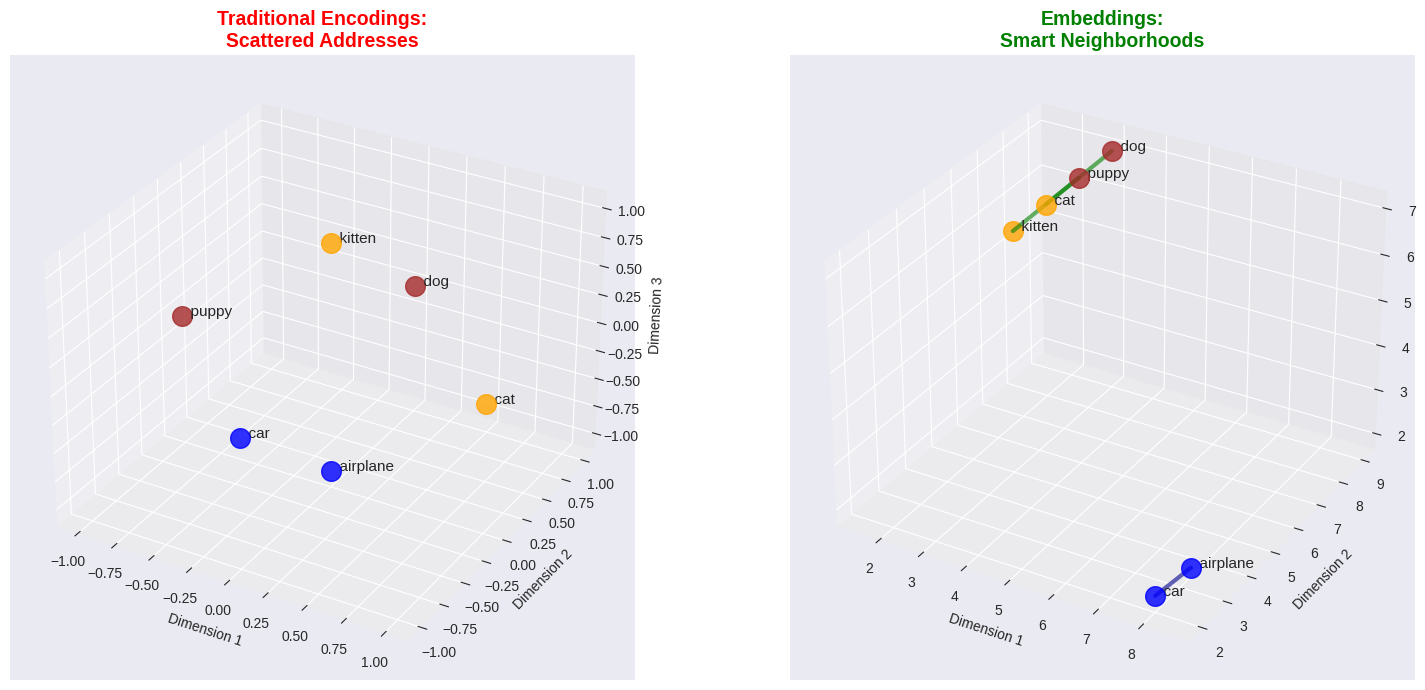

In [5]:
def introduce_embeddings_concept_3d():
    """
    Introduce embeddings as smart addresses in 3D space
    """
    fig = plt.figure(figsize=(16, 7))
    
    # LEFT SIDE: Traditional encodings - scattered randomly
    ax1 = fig.add_subplot(121, projection='3d')
    
    # Words scattered randomly (like one-hot encoding)
    random_locations = {
        'cat': [1, 0, 0],
        'dog': [0, 1, 0], 
        'kitten': [0, 0, 1],
        'puppy': [-1, 0, 0],
        'car': [0, -1, 0],
        'airplane': [0, 0, -1]
    }
    
    # Colors by semantic category
    colors = {'cat': 'orange', 'kitten': 'orange', 
              'dog': 'brown', 'puppy': 'brown',
              'car': 'blue', 'airplane': 'blue'}
    
    for word, pos in random_locations.items():
        ax1.scatter(pos[0], pos[1], pos[2], s=200, c=colors[word], alpha=0.8)
        ax1.text(pos[0], pos[1], pos[2], f'  {word}', fontsize=11)
    
    ax1.set_title('Traditional Encodings:\nScattered Addresses', 
                  fontsize=14, weight='bold', color='red')
    ax1.set_xlabel('Dimension 1')
    ax1.set_ylabel('Dimension 2')
    ax1.set_zlabel('Dimension 3')
    
    # RIGHT SIDE: Embeddings - smart clustering
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Words clustered by meaning
    smart_locations = {
        # Animal cluster (close together)
        'cat': [2, 8, 6],
        'dog': [3, 9, 7], 
        'kitten': [1.5, 7.5, 5.5],
        'puppy': [2.5, 8.5, 6.5],
        # Vehicle cluster (close together, but far from animals)
        'car': [8, 2, 2],
        'airplane': [8.5, 2.5, 2.5]
    }
    
    for word, pos in smart_locations.items():
        ax2.scatter(pos[0], pos[1], pos[2], s=200, c=colors[word], alpha=0.8)
        ax2.text(pos[0], pos[1], pos[2], f'  {word}', fontsize=11)
    
    # Draw lines connecting similar words within clusters
    animal_pairs = [(['cat', 'dog'], 'green'), (['kitten', 'puppy'], 'green')]
    for pair, color in animal_pairs:
        pos1 = smart_locations[pair[0]]
        pos2 = smart_locations[pair[1]]
        ax2.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], 
                color=color, alpha=0.6, linewidth=3)
    
    # Connect vehicles
    pos1 = smart_locations['car']
    pos2 = smart_locations['airplane']
    ax2.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], 
            color='darkblue', alpha=0.6, linewidth=3)
    
    ax2.set_title('Embeddings:\nSmart Neighborhoods', 
                  fontsize=14, weight='bold', color='green')
    ax2.set_xlabel('Dimension 1')
    ax2.set_ylabel('Dimension 2')
    ax2.set_zlabel('Dimension 3')
    
    plt.tight_layout()
    plt.show()

# Run the corrected version
introduce_embeddings_concept_3d()